<a href="https://colab.research.google.com/github/podikakos/AIDL_A_02/blob/main/2020_2021_AIDL02_0012_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!df -h
!cat /proc/cpuinfo
!cat /proc/meminfo
!nvidia-smi


Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   39G   70G  36% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.9G     0  5.9G   0% /dev/shm
tmpfs           6.4G   28K  6.4G   1% /var/colab
/dev/sda1        76G   41G   35G  55% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.210
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpu

In [ ]:
%pip install wandb -q
import wandb
from wandb.keras import WandbCallback

     |████████████████████████████████| 1.8MB 34.2MB/s 
     |████████████████████████████████| 102kB 13.1MB/s 
     |████████████████████████████████| 133kB 60.0MB/s 
     |████████████████████████████████| 174kB 51.0MB/s 
     |████████████████████████████████| 71kB 10.0MB/s 


In [ ]:
import matplotlib.pyplot as plt
import re
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import regularizers
%matplotlib inline
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

!pip install wandb -qq
import wandb
from wandb.keras import WandbCallback

import matplotlib.pyplot as plt
import seaborn as sns

!wandb login --relogin
wandb.login()

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


wandb: Currently logged in as: podikakos (use `wandb login --relogin` to force relogin)


True

In [ ]:
sweep_config = {
    'method': 'grid'
    }

In [ ]:
metric = {
    'name': 'loss',
    'goal': 'minimize'   
    }

sweep_config['metric'] = metric

In [ ]:
parameters_dict = {
 'learning-rate':{
        'values': [0.001, 0.003, 0.005]
        },
    'fc_layer_size': {
        'values': [128, 256, 512]
        },
    'dropout': {
          'values': [0.3, 0.4, 0.5]
        },
    }

sweep_config['parameters'] = parameters_dict

In [ ]:
parameters_dict.update({
    'epochs': {
        'value': 20}
    })

In [ ]:
import pprint

pprint.pprint(sweep_config)

{'method': 'grid',
 'metric': {'goal': 'minimize', 'name': 'loss'},
 'parameters': {'dropout': {'values': [0.3, 0.4, 0.5]},
                'fc_layer_size': {'values': [128, 256, 512]},
                'learning-rate': {'values': [0.001, 0.003, 0.005]}}}


In [ ]:
sweep_id = wandb.sweep(sweep_config, entity="podikakos", project="DEDALUS2")

Create sweep with ID: z8907hi3
Sweep URL: https://wandb.ai/podikakos/DEDALUS2/sweeps/z8907hi3


In [ ]:
print(tf.__version__)

2.5.0


In [ ]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 600)
pd.set_option('display.width', 2000)
pd.options.display.max_colwidth = 200

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("drive/My Drive/TEST DATA OBI/PATENTS_cleaned2.csv", sep=';')
df.head()

CLASS                                                                                                                                                                                                 ABSTRACT  Unnamed: 2
0  ΜΗΧΑΝΟΛΟΓΙΚΟ  Το ενιαίο διαμορφωμένο φύλλο (1) του παντζουριού βαίνει συρταρωτά εντός πλαισίου κουφώματος αλουμινίου και επιτυγχάνεται η άμεση κατασκευή του με μικρότερο κόστος προσφέροντας μεγαλύτερη ασφάλεια....         NaN
1  ΜΗΧΑΝΟΛΟΓΙΚΟ  \nΣτην παρούσα εφεύρεση παρουσιάζεται μέθοδος και σύστημα για την in vivo ανίχνευση αλλοιώσεων στα βιοχημικά ή και στα λειτουργικά χαρακτηριστικά ιστών και την χαρτογράφηση του βαθμού της αλλοίωση...         NaN
2  ΜΗΧΑΝΟΛΟΓΙΚΟ  Ο νέος τύπος αντλίας-κινητήρος είναι μία μηχανή που λειτουργεί είτε ως αντλία περιστροφική, είτε ως κινητήρ. Ο τύπος αυτός "αντλιο-κινητήρος" αποτελείται από: τον "στάτορα" (1), τον "ρότορα" (2), ...         NaN
3  ΜΗΧΑΝΟΛΟΓΙΚΟ  Σιφόνι δαπέδου πλαστικό από πολυπροπυλένιο, με σπειρώματα και λάστιχα-ρακόρ ταχυένωσης σε εισαγωγές και εξαγωγή, σύστημα υπερχείλισης και συγκράτησης νερού και αφρού. Το σιφόνι αποτελείται από τρί...         NaN
4  ΜΗΧΑΝΟΛΟΓΙΚΟ  Καπάκι-αποθήκη για κάθε είδους δοχεία, το οποίο αποτελείται απο μία σταθερή βάση (1) της οποίας η εσωτερικά κλειστή επιφάνεια (6) φέρει ένα μόνο άνοιγμα (7) και απο έναν κινητό αποσπώμενο επιλογέα...         NaN

In [ ]:
df.describe(include='all')

CLASS                                                                                                                                                                                                 ABSTRACT  Unnamed: 2
count           8979                                                                                                                                                                                                     8979         0.0
unique             3                                                                                                                                                                                                     8954         NaN
top     ΜΗΧΑΝΟΛΟΓΙΚΟ  ..                                                                                                                                                                                                  ...         NaN
freq            5726                                                                                                                                                                                                        4         NaN
mean             NaN                                                                                                                                                                                                      NaN         NaN
std              NaN                                                                                                                                                                                                      NaN         NaN
min              NaN                                                                                                                                                                                                      NaN         NaN
25%              NaN                                                                                                                                                                                                      NaN         NaN
50%              NaN                                                                                                                                                                                                      NaN         NaN
75%              NaN                                                                                                                                                                                                      NaN         NaN
max              NaN                                                                                                                                                                                                      NaN         NaN

In [ ]:
df.index

RangeIndex(start=0, stop=8979, step=1)

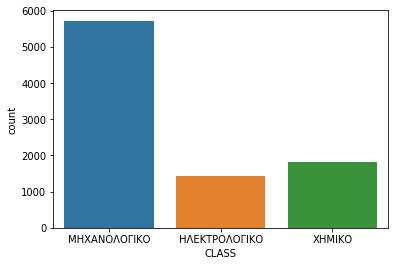

In [ ]:
sns.countplot(x = 'CLASS', data =df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8979 entries, 0 to 8978
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CLASS       8979 non-null   object 
 1   ABSTRACT    8979 non-null   object 
 2   Unnamed: 2  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 210.6+ KB


In [ ]:
df['CLASS'].value_counts()

ΜΗΧΑΝΟΛΟΓΙΚΟ     5726
ΧΗΜΙΚΟ           1821
ΗΛΕΚΤΡΟΛΟΓΙΚΟ    1432
Name: CLASS, dtype: int64

In [ ]:
from sklearn.utils import class_weight
class_weights = list(class_weight.compute_class_weight('balanced',
                                             np.unique(df['CLASS']),
                                             df['CLASS']))

In [ ]:
class_weights.sort()

In [ ]:
class_weights

[0.5227034579112819, 1.643602416254805, 2.0900837988826817]

In [ ]:
type(class_weights)

list

In [ ]:
class_weights[0], class_weights[1] = class_weights[1], class_weights[0]
class_weights[0], class_weights[2] = class_weights[2], class_weights[0]
class_weights

[2.0900837988826817, 0.5227034579112819, 1.643602416254805]

In [ ]:
weights={}

In [ ]:
for index, weight in enumerate(class_weights) :
  weights[index]=weight

In [ ]:
weights

{0: 2.0900837988826817, 1: 0.5227034579112819, 2: 1.643602416254805}

In [ ]:
df.count()

CLASS         8979
ABSTRACT      8979
Unnamed: 2       0
dtype: int64

In [ ]:
df.sample(frac=1)

CLASS                                                                                                                                                                                                 ABSTRACT  Unnamed: 2
5061  ΗΛΕΚΤΡΟΛΟΓΙΚΟ  Η παρούσα εφεύρεση σχετίζεται με τη μικροεκχύλιση στερεής φάσης (SPME) και την υγρή μικροεκχύλιση (SME) επίσης γνωστή ως μικροεκχύλιση υγρής φάσης (LPME) και αφορά συσκευές και μεθόδους δειγματολη...         NaN
4183   ΜΗΧΑΝΟΛΟΓΙΚΟ  Γραναζωτή Αντλία Διπλού Χιτωνίου που αποτελείται από το σώμα γραναζωτής αντλίας αποτελούμενο από τον κορμό (7) και το πρόσθιο και οπίσθιο καπάκι έδρασης αξόνων (6) και (8) αντίστοιχα, και περιβάλλ...         NaN
120   ΗΛΕΚΤΡΟΛΟΓΙΚΟ  Μέθοδος προστασίας των οπτικών δίσκων με κλείδωμα ενός ή και περισσότερων αρχείων χρήσιμων για το πρόγραμμα στον οπτικό δίσκο.Το κλείδωμα επιτυγχάνεται με μερική ή ολική καταστροφή άχρηστου για το...         NaN
406    ΜΗΧΑΝΟΛΟΓΙΚΟ  Η γωνία συνδέσεως των προφίλ φέρει κοχλία (4) ο οποίος πιέζει δύο ελατήρια (6) και τα οποία ωθούν κυλινδρικά εξαρτήματα (7) τα οποία πιέζουν τα προφίλ προς την ακμή τους ενώ ταυτόχρονα τα ευθυγραμ...         NaN
418          ΧΗΜΙΚΟ  Σύστημα αυτόματου ελέγχου βασιζόμενο σε μικρουπολογιστικό σύστημα κατάλληλο να ρυθμίζει είτε την ταχύτητα περιστροφής είτε την ποσότητα νερού ανά στρέμμα σε ένα αυτόματο αρδευτικό συγκρότημα. Αποτ...         NaN
...             ...                                                                                                                                                                                                      ...         ...
3876  ΗΛΕΚΤΡΟΛΟΓΙΚΟ  Η εφεύρεση αναφέρεται σε κλειστό ασύρματο σύστημα ειδοποίησης, αποτελούμενο από αριθμό πομπών εντός καταστήματος στερεωμένων επί των τραπεζιών αυτού και δέκτη σταθερό ή αριθμό φορητών δεκτών ίσο μ...         NaN
339          ΧΗΜΙΚΟ  Στον (ΜΑΕΜ-ΧΒΕΙΣ) δεν υπάρχει ηλεκτρική βαλβίδα εισαγωγής. Το ακροφήσιο εισαγωγής εκτείνεται μέσα στο Θάλαμο Ελέγχου κατά τρόπο ώστε το στόμιό του να καταλήγει σε ύψος [[h]] απο τον πυθμένα του ΜΕ...         NaN
5753   ΜΗΧΑΝΟΛΟΓΙΚΟ  Τοποθετούνται σε οριζόντιες ή κάθετες επιφάνειες όπως κάτω από τα ντουλάπια κουζίνας ή άλλων χώρων καθώς και σε κάθετες επιφάνειες.                                                                 ...         NaN
2243   ΜΗΧΑΝΟΛΟΓΙΚΟ  Προϊόν συσκευασίας και περιτύλιξης με διαφάνεια. Το προϊόν αυτό αποτελείται από τρεις λωρίδες. Αλουμινόχαρτο (1) στη μέση των οποίων παρεμβάλλεται μια λωρίδα διάφανου υλικού [πολυπροπυλένιο (ΡΡ)] ...         NaN
8804         ΧΗΜΙΚΟ  Απλό φίλτρο νερού που περιέχει γκρι κεραμικούς σωληνίσκους (9) εμποτισμένους με ενεργούς μικροοργανισμούς ΕΜ1 του Δρ. Τέρουο Χίγκα. Οι γκρι κεραμικοί σωληνίσκοι (9) εμποτισμένοι με ενεργούς μικροο...         NaN

[8979 rows x 3 columns]

In [ ]:
# split dataset
x_train = df['ABSTRACT'].iloc[:-1]
y_train = df['CLASS'].iloc[:-1]
print(x_train.size)
print(y_train.size)

8978
8978


In [ ]:
for i in range(6):
  print("The number of words in review {} is equal to: {}".format(i,len(x_train[i])))
# print(len(X_train[4876]))

The number of words in review 0 is equal to: 5000
The number of words in review 1 is equal to: 4999
The number of words in review 2 is equal to: 5000
The number of words in review 3 is equal to: 4994
The number of words in review 4 is equal to: 5000
The number of words in review 5 is equal to: 5000


In [ ]:
import re
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.tokenize import word_tokenize
print(stopwords.words('greek'))
stop_words = stopwords.words('greek')
stop_words.extend(['είναι','ή','από','της','ή','ένα','τη','έχει','οτι','οποίο','οποία','τους','μέσα','μέσω','ως','έναν','επί','πχ','το','στα','ότι','στα','πιο','αυτής','αυτό','έτσι','άλλο','αυτή','σαν','μας','όπως','αυτά','στις','μαζί','τοις','εάν','εαν','όσων','όπου','ώστε','κάθε','προς','ενός','σχήμα','ενώ','είτε','όταν','εν','καθώς', 'σχέδιο','αλλά','άλλα','στους','έως','πολλές','μόνο','αυτού','πολύ','οποίου','κλπ','κτλ','αφού','υπό','όσο','τόσο','εκ','εις','εξ','ολα','άλλη','άλλες','άλλων','έχουμε','όλες','ίδια','διά','οχι','όχι','νέα','όλο','ανά','αυτός','αυτήν','πρώτο','ήδη','όλη','όλων','πριν','αρ','σχήματα','σχέδια','εξής','γιατί'])
stop_words.extend(['ένας','μία','μια','μιας','μίας', 'δυο', 'δύο', 'τρία','τριών','τρεις'])
stop_words.extend(['σχ'])
stop_words.extend(['εφεύρεση', 'εφεύρεσης', 'αποτελείται', 'μπορεί','χωρίς', 'παρούσα', 'αναφέρεται', 'τρόπο', 'πλεονέκτημα', 'αποτέλεσμα','οποίες', 'όλα', 'δια'])
stop_words.extend(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'])
stop_words.extend(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])
stop_words.extend(['α','β','γ','δ','ε','ζ','η','θ','ι','κ','λ','μ','ν','ξ','ο','π','ρ','σ','τ','υ','φ','χ','ψ','ω','ς','στ'])
stop_words.extend(['Α','Β','Γ','Δ','Ε','Ζ','Η','Θ','Ι','Κ','Λ','Μ','Ν','Ξ','Ο','Π','Ρ','Σ','Τ','Υ','Φ','Χ','Ψ','Ω','ΣΤ'])
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['αλλα', 'αν', 'αντι', 'απο', 'αυτα', 'αυτεσ', 'αυτη', 'αυτο', 'αυτοι', 'αυτοσ', 'αυτουσ', 'αυτων', 'αἱ', 'αἳ', 'αἵ', 'αὐτόσ', 'αὐτὸς', 'αὖ', 'γάρ', 'γα', 'γα^', 'γε', 'για', 'γοῦν', 'γὰρ', "δ'", 'δέ', 'δή', 'δαί', 'δαίσ', 'δαὶ', 'δαὶς', 'δε', 'δεν', "δι'", 'διά', 'διὰ', 'δὲ', 'δὴ', 'δ’', 'εαν', 'ειμαι', 'ειμαστε', 'ειναι', 'εισαι', 'ειστε', 'εκεινα', 'εκεινεσ', 'εκεινη', 'εκεινο', 'εκεινοι', 'εκεινοσ', 'εκεινουσ', 'εκεινων', 'ενω', 'επ', 'επι', 'εἰ', 'εἰμί', 'εἰμὶ', 'εἰς', 'εἰσ', 'εἴ', 'εἴμι', 'εἴτε', 'η', 'θα', 'ισωσ', 'κ', 'καί', 'καίτοι', 'καθ', 'και', 'κατ', 'κατά', 'κατα', 'κατὰ', 'καὶ', 'κι', 'κἀν', 'κἂν', 'μέν', 'μή', 'μήτε', 'μα', 'με', 'μεθ', 'μετ', 'μετά', 'μετα', 'μετὰ', 'μη', 'μην', 'μἐν', 'μὲν', 'μὴ', 'μὴν', 'να', 'ο', 'οι', 'ομωσ', 'οπωσ', 'οσο', 'οτι', 'οἱ'

In [ ]:
x_train.iloc[:10].apply(lambda x: nltk.word_tokenize(x))

0    [Το, ενιαίο, διαμορφωμένο, φύλλο, (, 1, ), του, παντζουριού, βαίνει, συρταρωτά, εντός, πλαισίου, κουφώματος, αλουμινίου, και, επιτυγχάνεται, η, άμεση, κατασκευή, του, με, μικρότερο, κόστος, προσφέ...
1    [Στην, παρούσα, εφεύρεση, παρουσιάζεται, μέθοδος, και, σύστημα, για, την, in, vivo, ανίχνευση, αλλοιώσεων, στα, βιοχημικά, ή, και, στα, λειτουργικά, χαρακτηριστικά, ιστών, και, την, χαρτογράφηση, ...
2    [Ο, νέος, τύπος, αντλίας-κινητήρος, είναι, μία, μηχανή, που, λειτουργεί, είτε, ως, αντλία, περιστροφική, ,, είτε, ως, κινητήρ, ., Ο, τύπος, αυτός, ``, αντλιο-κινητήρος, '', αποτελείται, από, :, το...
3    [Σιφόνι, δαπέδου, πλαστικό, από, πολυπροπυλένιο, ,, με, σπειρώματα, και, λάστιχα-ρακόρ, ταχυένωσης, σε, εισαγωγές, και, εξαγωγή, ,, σύστημα, υπερχείλισης, και, συγκράτησης, νερού, και, αφρού, ., Τ...
4    [Καπάκι-αποθήκη, για, κάθε, είδους, δοχεία, ,, το, οποίο, αποτελείται, απο, μία, σταθερή, βάση, (, 1, ), της, οποίας, η, εσωτερικά, κλειστή, επιφάνεια, (, 6, ), φέρει, ένα, μό

In [ ]:
def preprocess(text):
    text = re.sub(r'http\S+', 'HTTPURL', text)#<URL>
    text = re.sub(r'<br\s?\/>|<br>', "", text) #remove <br>
    text = nltk.word_tokenize(text.lower()) #lower case
    text = [w for w in text if not w in stop_words]
    text = (" ").join(text)
    text = re.sub(r"([.!?])", r"", text)
    text = re.sub(r"[^a-zA-Zα-ωΑ-Ωά-ώΆ-Ώ.!?]+", r" ", text)
    text = re.sub(r"\s+", r" ", text).strip()
    return text

x_train = x_train.apply(preprocess)

In [ ]:
print(x_train)

0                                   ενιαίο διαμορφωμένο φύλλο παντζουριού βαίνει συρταρωτά εντός πλαισίου κουφώματος αλουμινίου επιτυγχάνεται άμεση κατασκευή μικρότερο κόστος προσφέροντας μεγαλύτερη ασφάλεια
1       παρουσιάζεται μέθοδος σύστημα in vivo ανίχνευση αλλοιώσεων βιοχημικά λειτουργικά χαρακτηριστικά ιστών χαρτογράφηση βαθμού αλλοίωσης χαρακτηριστικών αυτών μέθοδος βασίζεται ταυτόχρονη μέτρηση χωρικ...
2       νέος τύπος αντλίας κινητήρος μηχανή λειτουργεί αντλία περιστροφική κινητήρ τύπος αντλιο κινητήρος στάτορα ρότορα περιστρεφόμενους φράκτες οδοντωτούς τροχούς οποίων τροχών συγχρονίζονται άξονες ρότ...
3       σιφόνι δαπέδου πλαστικό πολυπροπυλένιο σπειρώματα λάστιχα ρακόρ ταχυένωσης εισαγωγές εξαγωγή σύστημα υπερχείλισης συγκράτησης νερού αφρού σιφόνι βασικά τμήματα καθένα απαρτίζεται επιμέρους εξαρτήμ...
4       καπάκι αποθήκη είδους δοχεία σταθερή βάση οποίας εσωτερικά κλειστή επιφάνεια φέρει άνοιγμα κινητό αποσπώμενο επιλογέα οποίος εσωτερικά διασχηματισμένος καθέτων 

In [ ]:
x_train = x_train.apply(preprocess)

In [ ]:
print(x_train)

0                                   ενιαίο διαμορφωμένο φύλλο παντζουριού βαίνει συρταρωτά εντός πλαισίου κουφώματος αλουμινίου επιτυγχάνεται άμεση κατασκευή μικρότερο κόστος προσφέροντας μεγαλύτερη ασφάλεια
1       παρουσιάζεται μέθοδος σύστημα in vivo ανίχνευση αλλοιώσεων βιοχημικά λειτουργικά χαρακτηριστικά ιστών χαρτογράφηση βαθμού αλλοίωσης χαρακτηριστικών αυτών μέθοδος βασίζεται ταυτόχρονη μέτρηση χωρικ...
2       νέος τύπος αντλίας κινητήρος μηχανή λειτουργεί αντλία περιστροφική κινητήρ τύπος αντλιο κινητήρος στάτορα ρότορα περιστρεφόμενους φράκτες οδοντωτούς τροχούς οποίων τροχών συγχρονίζονται άξονες ρότ...
3       σιφόνι δαπέδου πλαστικό πολυπροπυλένιο σπειρώματα λάστιχα ρακόρ ταχυένωσης εισαγωγές εξαγωγή σύστημα υπερχείλισης συγκράτησης νερού αφρού σιφόνι βασικά τμήματα καθένα απαρτίζεται επιμέρους εξαρτήμ...
4       καπάκι αποθήκη είδους δοχεία σταθερή βάση οποίας εσωτερικά κλειστή επιφάνεια φέρει άνοιγμα κινητό αποσπώμενο επιλογέα οποίος εσωτερικά διασχηματισμένος καθέτων 

In [ ]:
pd.set_option('display.max_column', None) # ME PROSOXH
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

word_to_counts = x_train.str.split(expand=True).stack().value_counts()
word_to_counts.size
word_to_counts

σύστημα                                       3258
χρήση                                         2806
βάση                                          1820
μεταξύ                                        1679
πάνω                                          1620
νερού                                         1556
δυνατότητα                                    1488
κάτω                                          1485
άξονα                                         1412
μέρος                                         1410
επίσης                                        1397
λόγω                                          1327
συσκευή                                       1297
επιφάνεια                                     1285
φέρει                                         1257
εντός                                         1198
κίνηση                                        1197
υλικό                                         1192
περιλαμβάνει                                  1191
ενέργειας                      

In [ ]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 600)
pd.set_option('display.width', 2000)
pd.options.display.max_colwidth = 200

In [ ]:
word_to_counts.size

60778

In [ ]:
import copy
most_freq_words = word_to_counts
total_words_size = most_freq_words.size
print(total_words_size)

60778


In [ ]:
word_2_index = {"SOS":0, "EOS":1, "UNK":2, "PAD":3}
index_2_word = {0: "SOS", 1: "EOS", 2:"UNK", 3:"PAD"}
n_words = 4

In [ ]:
def add_to_voc(text, word_2_index, index_2_word, most_freq_words, n_words):
  for word in text.split(' '):
    if word not in word_2_index:
      if word in most_freq_words:
        word_2_index[word] = n_words
        index_2_word[n_words] = word
        n_words += 1
      else:
        word_2_index[word] = word_2_index['UNK']
  return word_2_index, index_2_word, n_words

In [ ]:
for i in x_train:
  word_2_index, index_2_word, n_words = add_to_voc(i, word_2_index, index_2_word, most_freq_words,n_words)

In [ ]:
word_2_index
total_words = len(word_2_index)
print(total_words)

60783


In [ ]:
def sentence_to_int(text): 
  text = nltk.word_tokenize(text.lower())
  ints = [word_2_index['SOS']]
  for word in text:
    if word in word_2_index:
      ints.append(word_2_index[word])
    else:
      ints.append(word_2_index['UNK'])

  return ints

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.1, random_state = 0)

In [ ]:
print(x_test.size)
print(x_train.size)
print(y_test.size)
print(y_train.size)

898
8080
898
8080


In [ ]:
x_train.head()

3350                      προτεινόμενη συμβολική συσκευασία γενικά προϊόντων καθαρισμού σύμφωνη χρήση ιδιαίτερα ανθρώπινο σώμα καλείται παραμερισθεί αμηχανία μέρος σώματος προορίζεται περιεχόμενο συσκευασίας
3030    κλείθρο συρόμενων εύκολη στήριξη ελατηριοφόρων τάκων συντελούν οπισθοχώρηση προστασία κλείθρου απόπειρα κλεισίματος γλώσσες ασφαλίσεως κλειδωμένη θέση έχουν μορφολογία επιτρέπει εγκατάσταση διαφορ...
162     ηλιοθερμική μέθοδος παραγωγής ενέργειας παρουσιάζει διακοπές διάρκεια παροδικής συννεφιάς συνεχίζεται λειτουργία κάποιο χρονικό διάστημα δύση ηλίουη μέθοδος διαθέτει συγκέντρωση ακτίνων ήλιου χρησ...
48      προτεινόμενη συσκευή δυνατότητα μιμείται εκείνες διαδικασίες αναγκαίο πραγματοποιήσει έμπειρος τάμπης παραδοσιακού καφενείου ψηθεί ελληνικός καφές σύμφωνα σχετικές επιστημονικές προδιαγραφές συσκε...
1123    βρίσκει εφαρμογή βιομηχανική παραγωγή προϊόντων περιλαμβάνουν κλάσματα ελαιολάδου πλούσια αναστολείς παράγοντα ενεργοποίησης αιμοπεταλίων έχουν αντιαθηρωματική 

In [ ]:
X_train = x_train.apply(sentence_to_int)
X_test = x_test.apply(sentence_to_int)

In [ ]:
X_train.head()

3350                                                                                            [0, 2036, 3975, 866, 917, 3446, 1387, 36823, 315, 467, 3186, 160, 6565, 36824, 36825, 187, 1021, 702, 256, 864]
3030    [0, 5365, 13269, 2967, 3895, 34811, 24863, 24022, 5382, 1652, 5372, 33994, 5972, 9466, 2792, 14329, 1002, 283, 1499, 268, 2397, 2990, 1707, 605, 5365, 34812, 3279, 3874, 1479, 431, 15306, 605, 166...
162     [0, 5413, 23, 323, 2117, 555, 5414, 957, 5415, 5416, 5417, 1010, 4396, 5418, 4499, 5419, 5420, 23, 2015, 5421, 5422, 2510, 5004, 5423, 5424, 3527, 5425, 5426, 2101, 4859, 2301, 5427, 2239, 5428, 5...
48      [0, 2036, 473, 64, 2037, 2038, 1131, 959, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 1518, 2047, 2048, 2049, 473, 711, 2050, 2051, 440, 238, 2052, 238, 151, 2053, 2054, 151, 24, 2055, 24, 421...
1123    [0, 2539, 53, 2855, 308, 3446, 1218, 19283, 12156, 7201, 4590, 10738, 1977, 19284, 283, 19285, 138, 11095, 3923, 37, 776, 1652, 2574, 5845, 8018, 1950, 11131, 1

In [ ]:
print(len(X_train[4876]))

82


In [ ]:
# set max sentence length to 200
def remove_and_pad(text):
  max_length = 199
  length = len(text)
  if length >= max_length:
    text = text[:max_length]
    text.append(word_2_index['EOS'])
  else:
    text.append(word_2_index['EOS'])
    diff = max_length-length
    for _ in range(diff):
      text.append(word_2_index['PAD'])


  return text

In [ ]:
X_train = X_train.apply(remove_and_pad)
X_test = X_test.apply(remove_and_pad)

In [ ]:
train_number = X_train.size
test_number = X_test.size

In [ ]:
print(len(X_train[4876]))

200


In [ ]:
train = np.zeros((train_number, 200))
for i, seq in enumerate(X_train):
  train[i,:] = seq

test = np.zeros((test_number, 200))
for i, seq in enumerate(X_test):
  test[i,:] = seq

In [ ]:
print(train)

[[0.0000e+00 2.0360e+03 3.9750e+03 ... 3.0000e+00 3.0000e+00 3.0000e+00]
 [0.0000e+00 5.3650e+03 1.3269e+04 ... 3.0000e+00 3.0000e+00 3.0000e+00]
 [0.0000e+00 5.4130e+03 2.3000e+01 ... 3.0000e+00 3.0000e+00 3.0000e+00]
 ...
 [0.0000e+00 2.8760e+03 2.0670e+03 ... 3.0000e+00 3.0000e+00 3.0000e+00]
 [0.0000e+00 3.3800e+03 2.8260e+03 ... 4.7820e+03 1.7765e+04 1.0000e+00]
 [0.0000e+00 2.4000e+01 3.8740e+03 ... 3.0000e+00 3.0000e+00 3.0000e+00]]


In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Activation, Dense, Embedding, GlobalAveragePooling1D, Dropout

In [ ]:
embedding_layer = tf.keras.layers.Embedding(total_words, 3)
embed = embedding_layer(tf.constant([1,2,3,4,5]))
embed.numpy()

array([[-0.00020511,  0.00280491, -0.03343602],
       [-0.02347949,  0.00046634,  0.02624338],
       [-0.02933085,  0.01127189, -0.03198681],
       [-0.04033213,  0.00228242,  0.01936522],
       [-0.01986082,  0.01690822, -0.04575329]], dtype=float32)

In [ ]:
print(y_train[:10])

3350     ΜΗΧΑΝΟΛΟΓΙΚΟ
3030     ΜΗΧΑΝΟΛΟΓΙΚΟ
162      ΜΗΧΑΝΟΛΟΓΙΚΟ
48       ΜΗΧΑΝΟΛΟΓΙΚΟ
1123     ΜΗΧΑΝΟΛΟΓΙΚΟ
5099    ΗΛΕΚΤΡΟΛΟΓΙΚΟ
6837     ΜΗΧΑΝΟΛΟΓΙΚΟ
2828     ΜΗΧΑΝΟΛΟΓΙΚΟ
1353     ΜΗΧΑΝΟΛΟΓΙΚΟ
1861     ΜΗΧΑΝΟΛΟΓΙΚΟ
Name: CLASS, dtype: object


In [ ]:
le = LabelEncoder()

train_labels = le.fit_transform(y_train)
Y_train = np.asarray( tf.keras.utils.to_categorical(train_labels))

train_labels = le.fit_transform(y_test)
print(train_labels[:10])
Y_test = np.asarray( tf.keras.utils.to_categorical(train_labels))

[1 1 1 0 1 1 1 1 1 1]


In [ ]:
print(Y_train[:10])

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [ ]:
xx_train, xx_test, yy_train, yy_test = train_test_split(train, Y_train, test_size = 0.2, random_state = 0)

In [ ]:
print(yy_test)

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D, Conv1D, Flatten, MaxPool1D, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
classes = ['ΗΛΕΚΤΡΟΛΟΓΙΚΟ', 'ΜΗΧΑΝΟΛΟΓΙΚΟ', 'ΧΗΜΙΚΟ']
def train():
    # Default values for hyper-parameters we're going to sweep over
    config_defaults = {
        'learning_rate': 1e-3,
        'dropout': 0.3,
        'fc_layer_size': 128,
        'seed': 42
    }

    # Initialize a new wandb run
    wandb.init(config=config_defaults)
    
    # Config is a variable that holds and saves hyperparameters and inputs
    config = wandb.config
    
    # Define the model architecture
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Embedding(total_words, 32, name="embedding"))
    model.add(tf.keras.layers.GlobalAveragePooling1D())
    model.add(Dense(config.fc_layer_size, activation="relu"))
    model.add(Dropout(config.dropout))
    model.add(Dense(3, activation="softmax"))
  


    

    batch_size = 128


    adam = tf.keras.optimizers.Adam(learning_rate=config.learning_rate)

    model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])
    model.fit(xx_train, yy_train, batch_size=batch_size,epochs=config.epochs,validation_data=(xx_test, yy_test), class_weight=weights,callbacks=[WandbCallback(validation_data=(xx_test, yy_test), labels=classes)])#EarlyStopping(patience=10, restore_best_weights=True)

In [ ]:
wandb.agent(sweep_id, train)

wandb: Agent Starting Run: dscg4srm with config:
wandb: 	dropout: 0.3
wandb: 	epochs: 20
wandb: 	fc_layer_size: 128
wandb: 	learning-rate: 0.001


Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/20
51/51 [==============================] - 3s 35ms/step - loss: 1.0970 - accuracy: 0.2423 - val_loss: 1.0947 - val_accuracy: 0.3546
Epoch 2/20
51/51 [==============================] - 2s 31ms/step - loss: 1.0708 - accuracy: 0.4728 - val_loss: 1.0577 - val_accuracy: 0.5705
Epoch 3/20
51/51 [==============================] - 2s 30ms/step - loss: 0.9331 - accuracy: 0.7101 - val_loss: 0.8773 - val_accuracy: 0.7345
Epoch 4/20
51/51 [==============================] - 2s 32ms/step - loss: 0.6609 - accuracy: 0.7972 - val_loss: 0.6675 - val_accuracy: 0.7871
Epoch 5/20
51/51 [==============================] - 2s 31ms/step - loss: 0.4393 - accuracy: 0.8580 - val_loss: 0.5242 - val_accuracy: 0.8119
Epoch 6/20
51/51 [==============================] - 2s 32ms/step - loss: 0.3038 - accuracy: 0.9101 - val_loss: 0.5261 - val_accuracy: 0.8113
Epoch 7/20
51/51

wandb: Agent Starting Run: d0aakkrg with config:
wandb: 	dropout: 0.3
wandb: 	epochs: 20
wandb: 	fc_layer_size: 128
wandb: 	learning-rate: 0.003


Epoch 1/20
51/51 [==============================] - 2s 39ms/step - loss: 1.0966 - accuracy: 0.4242 - val_loss: 1.0835 - val_accuracy: 0.3577
Epoch 2/20
51/51 [==============================] - 2s 33ms/step - loss: 1.0708 - accuracy: 0.6160 - val_loss: 1.0418 - val_accuracy: 0.7450
Epoch 3/20
51/51 [==============================] - 2s 31ms/step - loss: 0.9421 - accuracy: 0.7559 - val_loss: 0.8261 - val_accuracy: 0.7766
Epoch 4/20
51/51 [==============================] - 2s 30ms/step - loss: 0.6760 - accuracy: 0.8089 - val_loss: 0.6639 - val_accuracy: 0.7667
Epoch 5/20
51/51 [==============================] - 2s 31ms/step - loss: 0.4508 - accuracy: 0.8581 - val_loss: 0.5606 - val_accuracy: 0.8014
Epoch 6/20
51/51 [==============================] - 2s 32ms/step - loss: 0.3087 - accuracy: 0.9032 - val_loss: 0.5179 - val_accuracy: 0.7995
Epoch 7/20
51/51 [==============================] - 2s 31ms/step - loss: 0.2143 - accuracy: 0.9425 - val_loss: 0.4561 - val_accuracy: 0.8397
Epoch 8/20
51

wandb: Agent Starting Run: 2u01tco7 with config:
wandb: 	dropout: 0.3
wandb: 	epochs: 20
wandb: 	fc_layer_size: 128
wandb: 	learning-rate: 0.005


Epoch 1/20
51/51 [==============================] - 2s 35ms/step - loss: 1.0968 - accuracy: 0.2842 - val_loss: 1.0816 - val_accuracy: 0.3014
Epoch 2/20
51/51 [==============================] - 2s 35ms/step - loss: 1.0747 - accuracy: 0.5020 - val_loss: 1.0658 - val_accuracy: 0.3329
Epoch 3/20
51/51 [==============================] - 2s 33ms/step - loss: 0.9536 - accuracy: 0.6672 - val_loss: 0.9038 - val_accuracy: 0.6646
Epoch 4/20
51/51 [==============================] - 2s 32ms/step - loss: 0.6898 - accuracy: 0.7653 - val_loss: 0.7156 - val_accuracy: 0.7457
Epoch 5/20
51/51 [==============================] - 2s 30ms/step - loss: 0.4646 - accuracy: 0.8405 - val_loss: 0.5952 - val_accuracy: 0.7748
Epoch 6/20
51/51 [==============================] - 2s 31ms/step - loss: 0.3238 - accuracy: 0.8922 - val_loss: 0.5090 - val_accuracy: 0.8218
Epoch 7/20
51/51 [==============================] - 2s 30ms/step - loss: 0.2316 - accuracy: 0.9267 - val_loss: 0.4688 - val_accuracy: 0.8317
Epoch 8/20
51

wandb: Agent Starting Run: 1bm8fu32 with config:
wandb: 	dropout: 0.3
wandb: 	epochs: 20
wandb: 	fc_layer_size: 256
wandb: 	learning-rate: 0.001


Epoch 1/20
51/51 [==============================] - 2s 36ms/step - loss: 1.0972 - accuracy: 0.3852 - val_loss: 1.0993 - val_accuracy: 0.2655
Epoch 2/20
51/51 [==============================] - 2s 34ms/step - loss: 1.0645 - accuracy: 0.5170 - val_loss: 1.0181 - val_accuracy: 0.6621
Epoch 3/20
51/51 [==============================] - 2s 32ms/step - loss: 0.8696 - accuracy: 0.7319 - val_loss: 0.8025 - val_accuracy: 0.7382
Epoch 4/20
51/51 [==============================] - 2s 32ms/step - loss: 0.5497 - accuracy: 0.8402 - val_loss: 0.6136 - val_accuracy: 0.7896
Epoch 5/20
51/51 [==============================] - 2s 34ms/step - loss: 0.3330 - accuracy: 0.8963 - val_loss: 0.5273 - val_accuracy: 0.8125
Epoch 6/20
51/51 [==============================] - 2s 33ms/step - loss: 0.2059 - accuracy: 0.9429 - val_loss: 0.4521 - val_accuracy: 0.8329
Epoch 7/20
51/51 [==============================] - 2s 34ms/step - loss: 0.1310 - accuracy: 0.9691 - val_loss: 0.4491 - val_accuracy: 0.8360
Epoch 8/20
51

wandb: Agent Starting Run: dpndc331 with config:
wandb: 	dropout: 0.3
wandb: 	epochs: 20
wandb: 	fc_layer_size: 256
wandb: 	learning-rate: 0.003


Epoch 1/20
51/51 [==============================] - 3s 38ms/step - loss: 1.0967 - accuracy: 0.2551 - val_loss: 1.0837 - val_accuracy: 0.5767
Epoch 2/20
51/51 [==============================] - 2s 35ms/step - loss: 1.0582 - accuracy: 0.4802 - val_loss: 1.0191 - val_accuracy: 0.5916
Epoch 3/20
51/51 [==============================] - 2s 33ms/step - loss: 0.8543 - accuracy: 0.6575 - val_loss: 0.8534 - val_accuracy: 0.6559
Epoch 4/20
51/51 [==============================] - 2s 35ms/step - loss: 0.5636 - accuracy: 0.8094 - val_loss: 0.6783 - val_accuracy: 0.7494
Epoch 5/20
51/51 [==============================] - 2s 34ms/step - loss: 0.3563 - accuracy: 0.8858 - val_loss: 0.5577 - val_accuracy: 0.8020
Epoch 6/20
51/51 [==============================] - 2s 33ms/step - loss: 0.2356 - accuracy: 0.9265 - val_loss: 0.4705 - val_accuracy: 0.8280
Epoch 7/20
51/51 [==============================] - 2s 34ms/step - loss: 0.1549 - accuracy: 0.9615 - val_loss: 0.4520 - val_accuracy: 0.8286
Epoch 8/20
51

wandb: Agent Starting Run: jkcuy3qa with config:
wandb: 	dropout: 0.3
wandb: 	epochs: 20
wandb: 	fc_layer_size: 256
wandb: 	learning-rate: 0.005


Epoch 1/20
51/51 [==============================] - 2s 37ms/step - loss: 1.0976 - accuracy: 0.2582 - val_loss: 1.0806 - val_accuracy: 0.6312
Epoch 2/20
51/51 [==============================] - 2s 36ms/step - loss: 1.0692 - accuracy: 0.6692 - val_loss: 1.0330 - val_accuracy: 0.7271
Epoch 3/20
51/51 [==============================] - 2s 34ms/step - loss: 0.8859 - accuracy: 0.7228 - val_loss: 0.7717 - val_accuracy: 0.7828
Epoch 4/20
51/51 [==============================] - 2s 34ms/step - loss: 0.5649 - accuracy: 0.8140 - val_loss: 0.5949 - val_accuracy: 0.7884
Epoch 5/20
51/51 [==============================] - 2s 33ms/step - loss: 0.3599 - accuracy: 0.8770 - val_loss: 0.5444 - val_accuracy: 0.7933
Epoch 6/20
51/51 [==============================] - 2s 34ms/step - loss: 0.2374 - accuracy: 0.9281 - val_loss: 0.5000 - val_accuracy: 0.8020
Epoch 7/20
51/51 [==============================] - 2s 33ms/step - loss: 0.1564 - accuracy: 0.9558 - val_loss: 0.4745 - val_accuracy: 0.8212
Epoch 8/20
51

wandb: Agent Starting Run: lq2zgkz4 with config:
wandb: 	dropout: 0.3
wandb: 	epochs: 20
wandb: 	fc_layer_size: 512
wandb: 	learning-rate: 0.001


Epoch 1/20
51/51 [==============================] - 2s 37ms/step - loss: 1.0975 - accuracy: 0.2737 - val_loss: 1.0906 - val_accuracy: 0.5217
Epoch 2/20
51/51 [==============================] - 2s 36ms/step - loss: 1.0610 - accuracy: 0.5972 - val_loss: 1.0120 - val_accuracy: 0.5978
Epoch 3/20
51/51 [==============================] - 2s 34ms/step - loss: 0.8072 - accuracy: 0.7386 - val_loss: 0.6952 - val_accuracy: 0.7748
Epoch 4/20
51/51 [==============================] - 2s 34ms/step - loss: 0.4604 - accuracy: 0.8430 - val_loss: 0.5518 - val_accuracy: 0.8075
Epoch 5/20
51/51 [==============================] - 2s 34ms/step - loss: 0.2676 - accuracy: 0.9103 - val_loss: 0.4665 - val_accuracy: 0.8335
Epoch 6/20
51/51 [==============================] - 2s 34ms/step - loss: 0.1580 - accuracy: 0.9542 - val_loss: 0.4806 - val_accuracy: 0.8243
Epoch 7/20
51/51 [==============================] - 2s 35ms/step - loss: 0.0966 - accuracy: 0.9787 - val_loss: 0.4517 - val_accuracy: 0.8410
Epoch 8/20
51

wandb: Agent Starting Run: iefabsdj with config:
wandb: 	dropout: 0.3
wandb: 	epochs: 20
wandb: 	fc_layer_size: 512
wandb: 	learning-rate: 0.003


Epoch 1/20
51/51 [==============================] - 3s 39ms/step - loss: 1.0975 - accuracy: 0.2655 - val_loss: 1.0853 - val_accuracy: 0.3651
Epoch 2/20
51/51 [==============================] - 2s 36ms/step - loss: 1.0536 - accuracy: 0.5789 - val_loss: 1.0006 - val_accuracy: 0.6101
Epoch 3/20
51/51 [==============================] - 2s 34ms/step - loss: 0.7837 - accuracy: 0.7387 - val_loss: 0.7057 - val_accuracy: 0.7624
Epoch 4/20
51/51 [==============================] - 2s 35ms/step - loss: 0.4507 - accuracy: 0.8456 - val_loss: 0.6129 - val_accuracy: 0.7556
Epoch 5/20
51/51 [==============================] - 2s 35ms/step - loss: 0.2687 - accuracy: 0.9098 - val_loss: 0.4827 - val_accuracy: 0.8199
Epoch 6/20
51/51 [==============================] - 2s 36ms/step - loss: 0.1598 - accuracy: 0.9585 - val_loss: 0.4510 - val_accuracy: 0.8323
Epoch 7/20
51/51 [==============================] - 2s 35ms/step - loss: 0.0993 - accuracy: 0.9765 - val_loss: 0.4526 - val_accuracy: 0.8342
Epoch 8/20
51

wandb: Agent Starting Run: bzbiqthq with config:
wandb: 	dropout: 0.3
wandb: 	epochs: 20
wandb: 	fc_layer_size: 512
wandb: 	learning-rate: 0.005


Epoch 1/20
51/51 [==============================] - 2s 37ms/step - loss: 1.0964 - accuracy: 0.2955 - val_loss: 1.0944 - val_accuracy: 0.2389
Epoch 2/20
51/51 [==============================] - 2s 35ms/step - loss: 1.0353 - accuracy: 0.4760 - val_loss: 0.9786 - val_accuracy: 0.6015
Epoch 3/20
51/51 [==============================] - 2s 34ms/step - loss: 0.7518 - accuracy: 0.6983 - val_loss: 0.7053 - val_accuracy: 0.7605
Epoch 4/20
51/51 [==============================] - 2s 34ms/step - loss: 0.4470 - accuracy: 0.8526 - val_loss: 0.5470 - val_accuracy: 0.8082
Epoch 5/20
51/51 [==============================] - 2s 34ms/step - loss: 0.2652 - accuracy: 0.9151 - val_loss: 0.4830 - val_accuracy: 0.8236
Epoch 6/20
51/51 [==============================] - 2s 35ms/step - loss: 0.1595 - accuracy: 0.9592 - val_loss: 0.4874 - val_accuracy: 0.8280
Epoch 7/20
51/51 [==============================] - 2s 35ms/step - loss: 0.0985 - accuracy: 0.9793 - val_loss: 0.4505 - val_accuracy: 0.8311
Epoch 8/20
51

wandb: Agent Starting Run: 89c7c392 with config:
wandb: 	dropout: 0.4
wandb: 	epochs: 20
wandb: 	fc_layer_size: 128
wandb: 	learning-rate: 0.001


Epoch 1/20
51/51 [==============================] - 2s 36ms/step - loss: 1.0973 - accuracy: 0.2718 - val_loss: 1.0913 - val_accuracy: 0.3038
Epoch 2/20
51/51 [==============================] - 2s 35ms/step - loss: 1.0756 - accuracy: 0.5314 - val_loss: 1.0799 - val_accuracy: 0.4697
Epoch 3/20
51/51 [==============================] - 2s 33ms/step - loss: 0.9537 - accuracy: 0.7079 - val_loss: 0.8665 - val_accuracy: 0.6912
Epoch 4/20
51/51 [==============================] - 2s 33ms/step - loss: 0.7015 - accuracy: 0.7930 - val_loss: 0.6851 - val_accuracy: 0.7686
Epoch 5/20
51/51 [==============================] - 2s 33ms/step - loss: 0.4714 - accuracy: 0.8569 - val_loss: 0.5670 - val_accuracy: 0.8045
Epoch 6/20
51/51 [==============================] - 2s 33ms/step - loss: 0.3198 - accuracy: 0.9022 - val_loss: 0.5741 - val_accuracy: 0.7723
Epoch 7/20
51/51 [==============================] - 2s 33ms/step - loss: 0.2283 - accuracy: 0.9384 - val_loss: 0.4681 - val_accuracy: 0.8292
Epoch 8/20
51

wandb: Agent Starting Run: jaxolq0b with config:
wandb: 	dropout: 0.4
wandb: 	epochs: 20
wandb: 	fc_layer_size: 128
wandb: 	learning-rate: 0.003


Epoch 1/20
51/51 [==============================] - 2s 36ms/step - loss: 1.0972 - accuracy: 0.3397 - val_loss: 1.0937 - val_accuracy: 0.2370
Epoch 2/20
51/51 [==============================] - 2s 33ms/step - loss: 1.0793 - accuracy: 0.4872 - val_loss: 1.0821 - val_accuracy: 0.4134
Epoch 3/20
51/51 [==============================] - 2s 32ms/step - loss: 0.9808 - accuracy: 0.6462 - val_loss: 0.9542 - val_accuracy: 0.6528
Epoch 4/20
51/51 [==============================] - 2s 32ms/step - loss: 0.7327 - accuracy: 0.7429 - val_loss: 0.7398 - val_accuracy: 0.7580
Epoch 5/20
51/51 [==============================] - 2s 32ms/step - loss: 0.4979 - accuracy: 0.8275 - val_loss: 0.6194 - val_accuracy: 0.7766
Epoch 6/20
51/51 [==============================] - 2s 33ms/step - loss: 0.3487 - accuracy: 0.8841 - val_loss: 0.5377 - val_accuracy: 0.8075
Epoch 7/20
51/51 [==============================] - 2s 32ms/step - loss: 0.2437 - accuracy: 0.9237 - val_loss: 0.4784 - val_accuracy: 0.8267
Epoch 8/20
51

wandb: Agent Starting Run: c0d9ggbl with config:
wandb: 	dropout: 0.4
wandb: 	epochs: 20
wandb: 	fc_layer_size: 128
wandb: 	learning-rate: 0.005


Epoch 1/20
51/51 [==============================] - 3s 38ms/step - loss: 1.0969 - accuracy: 0.2907 - val_loss: 1.0928 - val_accuracy: 0.3348
Epoch 2/20
51/51 [==============================] - 2s 36ms/step - loss: 1.0738 - accuracy: 0.4834 - val_loss: 1.0551 - val_accuracy: 0.5198
Epoch 3/20
51/51 [==============================] - 2s 33ms/step - loss: 0.9566 - accuracy: 0.6612 - val_loss: 0.9091 - val_accuracy: 0.6925
Epoch 4/20
51/51 [==============================] - 2s 34ms/step - loss: 0.7203 - accuracy: 0.7647 - val_loss: 0.6992 - val_accuracy: 0.7611
Epoch 5/20
51/51 [==============================] - 2s 35ms/step - loss: 0.4955 - accuracy: 0.8417 - val_loss: 0.6348 - val_accuracy: 0.7704
Epoch 6/20
51/51 [==============================] - 2s 34ms/step - loss: 0.3503 - accuracy: 0.8861 - val_loss: 0.5227 - val_accuracy: 0.8199
Epoch 7/20
51/51 [==============================] - 2s 33ms/step - loss: 0.2467 - accuracy: 0.9270 - val_loss: 0.4755 - val_accuracy: 0.8267
Epoch 8/20
51

wandb: Agent Starting Run: 9xsp4f3r with config:
wandb: 	dropout: 0.4
wandb: 	epochs: 20
wandb: 	fc_layer_size: 256
wandb: 	learning-rate: 0.001


Epoch 1/20
51/51 [==============================] - 3s 38ms/step - loss: 1.0969 - accuracy: 0.3151 - val_loss: 1.0963 - val_accuracy: 0.2735
Epoch 2/20
51/51 [==============================] - 2s 36ms/step - loss: 1.0674 - accuracy: 0.5209 - val_loss: 1.0306 - val_accuracy: 0.6572
Epoch 3/20
51/51 [==============================] - 2s 35ms/step - loss: 0.8850 - accuracy: 0.7011 - val_loss: 0.8445 - val_accuracy: 0.6528
Epoch 4/20
51/51 [==============================] - 2s 35ms/step - loss: 0.5727 - accuracy: 0.8009 - val_loss: 0.6438 - val_accuracy: 0.7550
Epoch 5/20
51/51 [==============================] - 2s 36ms/step - loss: 0.3644 - accuracy: 0.8707 - val_loss: 0.5129 - val_accuracy: 0.8119
Epoch 6/20
51/51 [==============================] - 2s 35ms/step - loss: 0.2481 - accuracy: 0.9179 - val_loss: 0.5014 - val_accuracy: 0.8088
Epoch 7/20
51/51 [==============================] - 2s 35ms/step - loss: 0.1581 - accuracy: 0.9541 - val_loss: 0.4548 - val_accuracy: 0.8323
Epoch 8/20
51

wandb: Agent Starting Run: msafo710 with config:
wandb: 	dropout: 0.4
wandb: 	epochs: 20
wandb: 	fc_layer_size: 256
wandb: 	learning-rate: 0.003


Epoch 1/20
51/51 [==============================] - 3s 39ms/step - loss: 1.0976 - accuracy: 0.3711 - val_loss: 1.0921 - val_accuracy: 0.2488
Epoch 2/20
51/51 [==============================] - 2s 38ms/step - loss: 1.0738 - accuracy: 0.4873 - val_loss: 1.0527 - val_accuracy: 0.4969
Epoch 3/20
51/51 [==============================] - 2s 35ms/step - loss: 0.9121 - accuracy: 0.6938 - val_loss: 0.7942 - val_accuracy: 0.7679
Epoch 4/20
51/51 [==============================] - 2s 36ms/step - loss: 0.5882 - accuracy: 0.8151 - val_loss: 0.6006 - val_accuracy: 0.7754
Epoch 5/20
51/51 [==============================] - 2s 36ms/step - loss: 0.3662 - accuracy: 0.8778 - val_loss: 0.4953 - val_accuracy: 0.8199
Epoch 6/20
51/51 [==============================] - 2s 36ms/step - loss: 0.2370 - accuracy: 0.9259 - val_loss: 0.4662 - val_accuracy: 0.8298
Epoch 7/20
51/51 [==============================] - 2s 35ms/step - loss: 0.1521 - accuracy: 0.9629 - val_loss: 0.4535 - val_accuracy: 0.8335
Epoch 8/20
51

wandb: Agent Starting Run: fg1zlktp with config:
wandb: 	dropout: 0.4
wandb: 	epochs: 20
wandb: 	fc_layer_size: 256
wandb: 	learning-rate: 0.005


Epoch 1/20
51/51 [==============================] - 3s 39ms/step - loss: 1.0973 - accuracy: 0.4472 - val_loss: 1.0958 - val_accuracy: 0.3007
Epoch 2/20
51/51 [==============================] - 2s 37ms/step - loss: 1.0631 - accuracy: 0.5213 - val_loss: 0.9998 - val_accuracy: 0.6460
Epoch 3/20
51/51 [==============================] - 2s 35ms/step - loss: 0.8722 - accuracy: 0.7234 - val_loss: 0.8207 - val_accuracy: 0.6906
Epoch 4/20
51/51 [==============================] - 2s 34ms/step - loss: 0.5566 - accuracy: 0.8114 - val_loss: 0.6203 - val_accuracy: 0.7834
Epoch 5/20
51/51 [==============================] - 2s 35ms/step - loss: 0.3484 - accuracy: 0.8863 - val_loss: 0.5635 - val_accuracy: 0.7871
Epoch 6/20
51/51 [==============================] - 2s 35ms/step - loss: 0.2243 - accuracy: 0.9313 - val_loss: 0.4559 - val_accuracy: 0.8292
Epoch 7/20
51/51 [==============================] - 2s 35ms/step - loss: 0.1460 - accuracy: 0.9633 - val_loss: 0.4462 - val_accuracy: 0.8323
Epoch 8/20
51

wandb: Agent Starting Run: cyn581th with config:
wandb: 	dropout: 0.4
wandb: 	epochs: 20
wandb: 	fc_layer_size: 512
wandb: 	learning-rate: 0.001


Epoch 1/20
51/51 [==============================] - 3s 40ms/step - loss: 1.0975 - accuracy: 0.4296 - val_loss: 1.0915 - val_accuracy: 0.3144
Epoch 2/20
51/51 [==============================] - 2s 39ms/step - loss: 1.0565 - accuracy: 0.5070 - val_loss: 1.0281 - val_accuracy: 0.4524
Epoch 3/20
51/51 [==============================] - 2s 36ms/step - loss: 0.8140 - accuracy: 0.6573 - val_loss: 0.8292 - val_accuracy: 0.6423
Epoch 4/20
51/51 [==============================] - 2s 36ms/step - loss: 0.4845 - accuracy: 0.8244 - val_loss: 0.5615 - val_accuracy: 0.8069
Epoch 5/20
51/51 [==============================] - 2s 36ms/step - loss: 0.2908 - accuracy: 0.9038 - val_loss: 0.4982 - val_accuracy: 0.8057
Epoch 6/20
51/51 [==============================] - 2s 35ms/step - loss: 0.1821 - accuracy: 0.9448 - val_loss: 0.4544 - val_accuracy: 0.8280
Epoch 7/20
51/51 [==============================] - 2s 36ms/step - loss: 0.1131 - accuracy: 0.9742 - val_loss: 0.4510 - val_accuracy: 0.8410
Epoch 8/20
51

wandb: Agent Starting Run: 69cphlkf with config:
wandb: 	dropout: 0.4
wandb: 	epochs: 20
wandb: 	fc_layer_size: 512
wandb: 	learning-rate: 0.003


Epoch 1/20
51/51 [==============================] - 3s 39ms/step - loss: 1.0983 - accuracy: 0.4933 - val_loss: 1.1043 - val_accuracy: 0.2073
Epoch 2/20
51/51 [==============================] - 2s 39ms/step - loss: 1.0735 - accuracy: 0.5135 - val_loss: 1.0147 - val_accuracy: 0.6429
Epoch 3/20
51/51 [==============================] - 2s 34ms/step - loss: 0.8575 - accuracy: 0.7471 - val_loss: 0.7223 - val_accuracy: 0.7624
Epoch 4/20
51/51 [==============================] - 2s 36ms/step - loss: 0.4933 - accuracy: 0.8278 - val_loss: 0.5878 - val_accuracy: 0.7618
Epoch 5/20
51/51 [==============================] - 2s 35ms/step - loss: 0.2962 - accuracy: 0.8914 - val_loss: 0.4733 - val_accuracy: 0.8255
Epoch 6/20
51/51 [==============================] - 2s 34ms/step - loss: 0.1774 - accuracy: 0.9474 - val_loss: 0.4540 - val_accuracy: 0.8329
Epoch 7/20
51/51 [==============================] - 2s 35ms/step - loss: 0.1090 - accuracy: 0.9752 - val_loss: 0.4623 - val_accuracy: 0.8311
Epoch 8/20
51

wandb: Agent Starting Run: oz9cmt2a with config:
wandb: 	dropout: 0.4
wandb: 	epochs: 20
wandb: 	fc_layer_size: 512
wandb: 	learning-rate: 0.005


Epoch 1/20
51/51 [==============================] - 3s 41ms/step - loss: 1.0981 - accuracy: 0.2403 - val_loss: 1.0853 - val_accuracy: 0.6473
Epoch 2/20
51/51 [==============================] - 2s 39ms/step - loss: 1.0608 - accuracy: 0.5014 - val_loss: 1.0264 - val_accuracy: 0.5124
Epoch 3/20
51/51 [==============================] - 2s 36ms/step - loss: 0.8122 - accuracy: 0.6050 - val_loss: 0.8185 - val_accuracy: 0.6615
Epoch 4/20
51/51 [==============================] - 2s 37ms/step - loss: 0.4961 - accuracy: 0.8144 - val_loss: 0.6121 - val_accuracy: 0.7778
Epoch 5/20
51/51 [==============================] - 2s 35ms/step - loss: 0.3016 - accuracy: 0.8996 - val_loss: 0.5297 - val_accuracy: 0.7840
Epoch 6/20
51/51 [==============================] - 2s 34ms/step - loss: 0.1854 - accuracy: 0.9469 - val_loss: 0.4665 - val_accuracy: 0.8304
Epoch 7/20
51/51 [==============================] - 2s 35ms/step - loss: 0.1139 - accuracy: 0.9749 - val_loss: 0.4518 - val_accuracy: 0.8373
Epoch 8/20
51

wandb: Agent Starting Run: wf52b6yr with config:
wandb: 	dropout: 0.5
wandb: 	epochs: 20
wandb: 	fc_layer_size: 128
wandb: 	learning-rate: 0.001


Epoch 1/20
51/51 [==============================] - 3s 41ms/step - loss: 1.0977 - accuracy: 0.3181 - val_loss: 1.0981 - val_accuracy: 0.2438
Epoch 2/20
51/51 [==============================] - 2s 39ms/step - loss: 1.0792 - accuracy: 0.5111 - val_loss: 1.0729 - val_accuracy: 0.5204
Epoch 3/20
51/51 [==============================] - 2s 35ms/step - loss: 0.9810 - accuracy: 0.6570 - val_loss: 0.9111 - val_accuracy: 0.7717
Epoch 4/20
51/51 [==============================] - 2s 36ms/step - loss: 0.7488 - accuracy: 0.7652 - val_loss: 0.7167 - val_accuracy: 0.7766
Epoch 5/20
51/51 [==============================] - 2s 35ms/step - loss: 0.5192 - accuracy: 0.8385 - val_loss: 0.6015 - val_accuracy: 0.8051
Epoch 6/20
51/51 [==============================] - 2s 35ms/step - loss: 0.3529 - accuracy: 0.8931 - val_loss: 0.5136 - val_accuracy: 0.8199
Epoch 7/20
51/51 [==============================] - 2s 34ms/step - loss: 0.2484 - accuracy: 0.9308 - val_loss: 0.4603 - val_accuracy: 0.8298
Epoch 8/20
51

wandb: Agent Starting Run: 2jdxyb04 with config:
wandb: 	dropout: 0.5
wandb: 	epochs: 20
wandb: 	fc_layer_size: 128
wandb: 	learning-rate: 0.003


Epoch 1/20
51/51 [==============================] - 2s 36ms/step - loss: 1.0976 - accuracy: 0.2345 - val_loss: 1.0937 - val_accuracy: 0.4499
Epoch 2/20
51/51 [==============================] - 2s 35ms/step - loss: 1.0826 - accuracy: 0.5557 - val_loss: 1.0853 - val_accuracy: 0.3292
Epoch 3/20
51/51 [==============================] - 2s 36ms/step - loss: 1.0031 - accuracy: 0.5800 - val_loss: 0.9395 - val_accuracy: 0.7048
Epoch 4/20
51/51 [==============================] - 2s 37ms/step - loss: 0.7798 - accuracy: 0.7531 - val_loss: 0.7683 - val_accuracy: 0.7618
Epoch 5/20
51/51 [==============================] - 2s 36ms/step - loss: 0.5431 - accuracy: 0.8320 - val_loss: 0.6490 - val_accuracy: 0.7754
Epoch 6/20
51/51 [==============================] - 2s 35ms/step - loss: 0.3718 - accuracy: 0.8827 - val_loss: 0.5276 - val_accuracy: 0.8144
Epoch 7/20
51/51 [==============================] - 2s 37ms/step - loss: 0.2652 - accuracy: 0.9166 - val_loss: 0.5073 - val_accuracy: 0.8187
Epoch 8/20
51

wandb: Agent Starting Run: t12abknq with config:
wandb: 	dropout: 0.5
wandb: 	epochs: 20
wandb: 	fc_layer_size: 128
wandb: 	learning-rate: 0.005


Epoch 1/20
51/51 [==============================] - 3s 40ms/step - loss: 1.0982 - accuracy: 0.4270 - val_loss: 1.0967 - val_accuracy: 0.2265
Epoch 2/20
51/51 [==============================] - 2s 39ms/step - loss: 1.0851 - accuracy: 0.4610 - val_loss: 1.0723 - val_accuracy: 0.4542
Epoch 3/20
51/51 [==============================] - 2s 37ms/step - loss: 1.0095 - accuracy: 0.5934 - val_loss: 0.9679 - val_accuracy: 0.6955
Epoch 4/20
51/51 [==============================] - 2s 35ms/step - loss: 0.7930 - accuracy: 0.7474 - val_loss: 0.7698 - val_accuracy: 0.7636
Epoch 5/20
51/51 [==============================] - 2s 37ms/step - loss: 0.5531 - accuracy: 0.8182 - val_loss: 0.6710 - val_accuracy: 0.7550
Epoch 6/20
51/51 [==============================] - 2s 36ms/step - loss: 0.3872 - accuracy: 0.8759 - val_loss: 0.5110 - val_accuracy: 0.8187
Epoch 7/20
51/51 [==============================] - 2s 36ms/step - loss: 0.2740 - accuracy: 0.9155 - val_loss: 0.4828 - val_accuracy: 0.8261
Epoch 8/20
51

wandb: Agent Starting Run: ie9xj5t3 with config:
wandb: 	dropout: 0.5
wandb: 	epochs: 20
wandb: 	fc_layer_size: 256
wandb: 	learning-rate: 0.001


Epoch 1/20
51/51 [==============================] - 3s 37ms/step - loss: 1.0981 - accuracy: 0.3379 - val_loss: 1.0872 - val_accuracy: 0.3502
Epoch 2/20
51/51 [==============================] - 2s 35ms/step - loss: 1.0791 - accuracy: 0.5710 - val_loss: 1.0730 - val_accuracy: 0.3032
Epoch 3/20
51/51 [==============================] - 2s 34ms/step - loss: 0.9309 - accuracy: 0.6694 - val_loss: 0.8336 - val_accuracy: 0.7420
Epoch 4/20
51/51 [==============================] - 2s 35ms/step - loss: 0.6135 - accuracy: 0.7907 - val_loss: 0.6544 - val_accuracy: 0.7605
Epoch 5/20
51/51 [==============================] - 2s 35ms/step - loss: 0.3883 - accuracy: 0.8637 - val_loss: 0.5214 - val_accuracy: 0.8150
Epoch 6/20
51/51 [==============================] - 2s 36ms/step - loss: 0.2546 - accuracy: 0.9205 - val_loss: 0.4804 - val_accuracy: 0.8255
Epoch 7/20
51/51 [==============================] - 2s 37ms/step - loss: 0.1709 - accuracy: 0.9533 - val_loss: 0.4828 - val_accuracy: 0.8137
Epoch 8/20
51

wandb: Agent Starting Run: d69qjhc0 with config:
wandb: 	dropout: 0.5
wandb: 	epochs: 20
wandb: 	fc_layer_size: 256
wandb: 	learning-rate: 0.003


Epoch 1/20
51/51 [==============================] - 3s 39ms/step - loss: 1.0986 - accuracy: 0.2288 - val_loss: 1.0965 - val_accuracy: 0.2649
Epoch 2/20
51/51 [==============================] - 2s 38ms/step - loss: 1.0859 - accuracy: 0.4672 - val_loss: 1.0869 - val_accuracy: 0.3583
Epoch 3/20
51/51 [==============================] - 2s 36ms/step - loss: 0.9746 - accuracy: 0.5846 - val_loss: 0.8834 - val_accuracy: 0.7679
Epoch 4/20
51/51 [==============================] - 2s 36ms/step - loss: 0.6698 - accuracy: 0.7707 - val_loss: 0.6500 - val_accuracy: 0.7970
Epoch 5/20
51/51 [==============================] - 2s 36ms/step - loss: 0.4355 - accuracy: 0.8388 - val_loss: 0.5369 - val_accuracy: 0.8113
Epoch 6/20
51/51 [==============================] - 2s 37ms/step - loss: 0.2882 - accuracy: 0.9004 - val_loss: 0.4747 - val_accuracy: 0.8274
Epoch 7/20
51/51 [==============================] - 2s 36ms/step - loss: 0.1939 - accuracy: 0.9381 - val_loss: 0.4518 - val_accuracy: 0.8397
Epoch 8/20
51

wandb: Agent Starting Run: 07p0dl1k with config:
wandb: 	dropout: 0.5
wandb: 	epochs: 20
wandb: 	fc_layer_size: 256
wandb: 	learning-rate: 0.005


Epoch 1/20
51/51 [==============================] - 3s 42ms/step - loss: 1.0974 - accuracy: 0.4556 - val_loss: 1.0995 - val_accuracy: 0.2228
Epoch 2/20
51/51 [==============================] - 2s 38ms/step - loss: 1.0710 - accuracy: 0.4446 - val_loss: 1.0265 - val_accuracy: 0.5804
Epoch 3/20
51/51 [==============================] - 2s 39ms/step - loss: 0.9089 - accuracy: 0.7191 - val_loss: 0.8655 - val_accuracy: 0.6788
Epoch 4/20
51/51 [==============================] - 2s 37ms/step - loss: 0.5931 - accuracy: 0.7973 - val_loss: 0.6290 - val_accuracy: 0.7723
Epoch 5/20
51/51 [==============================] - 2s 37ms/step - loss: 0.3760 - accuracy: 0.8688 - val_loss: 0.5091 - val_accuracy: 0.8057
Epoch 6/20
51/51 [==============================] - 2s 37ms/step - loss: 0.2533 - accuracy: 0.9191 - val_loss: 0.4782 - val_accuracy: 0.8243
Epoch 7/20
51/51 [==============================] - 2s 38ms/step - loss: 0.1667 - accuracy: 0.9530 - val_loss: 0.4622 - val_accuracy: 0.8280
Epoch 8/20
51

wandb: Agent Starting Run: drp9ujbu with config:
wandb: 	dropout: 0.5
wandb: 	epochs: 20
wandb: 	fc_layer_size: 512
wandb: 	learning-rate: 0.001


Epoch 1/20
51/51 [==============================] - 3s 42ms/step - loss: 1.0974 - accuracy: 0.4310 - val_loss: 1.0974 - val_accuracy: 0.2444
Epoch 2/20
51/51 [==============================] - 2s 41ms/step - loss: 1.0601 - accuracy: 0.5063 - val_loss: 0.9747 - val_accuracy: 0.7692
Epoch 3/20
51/51 [==============================] - 2s 38ms/step - loss: 0.8271 - accuracy: 0.7163 - val_loss: 0.7287 - val_accuracy: 0.7754
Epoch 4/20
51/51 [==============================] - 2s 38ms/step - loss: 0.5031 - accuracy: 0.8325 - val_loss: 0.5780 - val_accuracy: 0.8051
Epoch 5/20
51/51 [==============================] - 2s 36ms/step - loss: 0.3030 - accuracy: 0.8957 - val_loss: 0.4688 - val_accuracy: 0.8298
Epoch 6/20
51/51 [==============================] - 2s 37ms/step - loss: 0.1836 - accuracy: 0.9476 - val_loss: 0.4421 - val_accuracy: 0.8311
Epoch 7/20
51/51 [==============================] - 2s 38ms/step - loss: 0.1176 - accuracy: 0.9717 - val_loss: 0.4500 - val_accuracy: 0.8360
Epoch 8/20
51

wandb: Agent Starting Run: qnlfm20c with config:
wandb: 	dropout: 0.5
wandb: 	epochs: 20
wandb: 	fc_layer_size: 512
wandb: 	learning-rate: 0.003


Epoch 1/20
51/51 [==============================] - 2s 36ms/step - loss: 1.0979 - accuracy: 0.3909 - val_loss: 1.0908 - val_accuracy: 0.4028
Epoch 2/20
51/51 [==============================] - 2s 35ms/step - loss: 1.0666 - accuracy: 0.5360 - val_loss: 1.0254 - val_accuracy: 0.5804
Epoch 3/20
51/51 [==============================] - 2s 32ms/step - loss: 0.8577 - accuracy: 0.7218 - val_loss: 0.7678 - val_accuracy: 0.7618
Epoch 4/20
51/51 [==============================] - 2s 33ms/step - loss: 0.5218 - accuracy: 0.8192 - val_loss: 0.6096 - val_accuracy: 0.7748
Epoch 5/20
51/51 [==============================] - 2s 34ms/step - loss: 0.3156 - accuracy: 0.8931 - val_loss: 0.4926 - val_accuracy: 0.8187
Epoch 6/20
51/51 [==============================] - 2s 33ms/step - loss: 0.1964 - accuracy: 0.9414 - val_loss: 0.4918 - val_accuracy: 0.8057
Epoch 7/20
51/51 [==============================] - 2s 33ms/step - loss: 0.1253 - accuracy: 0.9670 - val_loss: 0.4458 - val_accuracy: 0.8329
Epoch 8/20
51

wandb: Agent Starting Run: qyso15sw with config:
wandb: 	dropout: 0.5
wandb: 	epochs: 20
wandb: 	fc_layer_size: 512
wandb: 	learning-rate: 0.005


Epoch 1/20
51/51 [==============================] - 3s 39ms/step - loss: 1.0975 - accuracy: 0.2633 - val_loss: 1.0885 - val_accuracy: 0.2667
Epoch 2/20
51/51 [==============================] - 2s 39ms/step - loss: 1.0566 - accuracy: 0.4189 - val_loss: 1.0132 - val_accuracy: 0.6658
Epoch 3/20
51/51 [==============================] - 2s 36ms/step - loss: 0.8103 - accuracy: 0.7102 - val_loss: 0.7207 - val_accuracy: 0.7519
Epoch 4/20
51/51 [==============================] - 2s 36ms/step - loss: 0.4877 - accuracy: 0.8241 - val_loss: 0.5804 - val_accuracy: 0.7871
Epoch 5/20
51/51 [==============================] - 2s 35ms/step - loss: 0.3050 - accuracy: 0.8906 - val_loss: 0.5110 - val_accuracy: 0.8131
Epoch 6/20
51/51 [==============================] - 2s 35ms/step - loss: 0.1923 - accuracy: 0.9381 - val_loss: 0.4763 - val_accuracy: 0.8249
Epoch 7/20
51/51 [==============================] - 2s 37ms/step - loss: 0.1227 - accuracy: 0.9672 - val_loss: 0.4468 - val_accuracy: 0.8403
Epoch 8/20
51

wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


In [ ]:
best_model = wandb.restore('model-best.h5', run_path="podikakos/DEDALUS2/wf52b6yr")

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(total_words, 32, name="embedding"))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(3, activation="softmax"))

# use the "name" attribute of the returned object if your framework expects a filename, e.g. as in Keras
model.load_weights(best_model.name)

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]) #WITH WANDB ONLY
results = model.evaluate(test, Y_test)
print(results)

29/29 [==============================] - 1s 1ms/step - loss: 0.4616 - accuracy: 0.8241
[0.4616088569164276, 0.8240534663200378]


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
embeddings = model.get_layer('embedding').get_weights()[0]

In [ ]:
pca = PCA(n_components=2)
result = pca.fit_transform(embeddings)

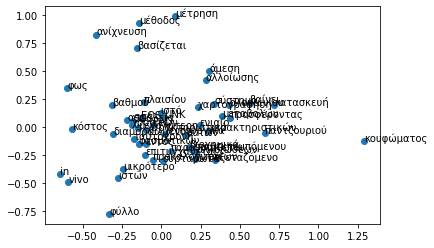

In [ ]:
words = list(word_2_index.keys())[:50]
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.scatter(result[:50, 0], result[:50, 1])

In [ ]:
def predict(text):
  processed1 = preprocess(text)
  processed = preprocess(processed1)
  inting = sentence_to_int(processed)
  pads = remove_and_pad(inting)
  pred = np.zeros((1,200))
  pred[0] = pads
  result = model.predict(pred) 
  return result




In [ ]:
abstract = "Ένα πτυσσόμενο κουτί συσκευασίας και μεταφοράς τροφήμων και ροφημάτων που κατασκευάσεται απο χαρτόνι το οποίο σε μία απο τις δυο μικρές πλευρές του διαθέτει εσοχές για την δημιουργία δυο εξωτερικών θέσεων τοποθέτησης ασφάλισης και μεταφοράς ποτηριών ροφημάτων με ζεύγος εγκοπών και περιμετρικά χείλη"
prediction = predict(abstract)
print(prediction)
prediction_arg = np.argmax(prediction)
find_class = np.array([0,1,2])
classes = le.inverse_transform(find_class)
print(classes)
print(prediction_arg)
print(classes[prediction_arg])


[[0.06975473 0.8226829  0.10756239]]
['ΗΛΕΚΤΡΟΛΟΓΙΚΟ' 'ΜΗΧΑΝΟΛΟΓΙΚΟ' 'ΧΗΜΙΚΟ']
1
ΜΗΧΑΝΟΛΟΓΙΚΟ


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(test)
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))

array([[ 96,  32,   7],
       [ 32, 523,  41],
       [  6,  40, 121]])

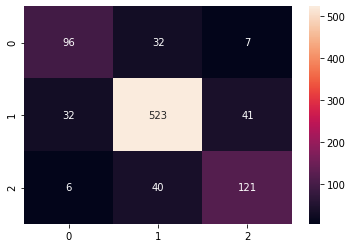

In [ ]:
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
from sklearn.metrics import classification_report, f1_score
y_pred = model.predict(test)
print(classification_report(Y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       135
           1       0.88      0.88      0.88       596
           2       0.72      0.72      0.72       167

    accuracy                           0.82       898
   macro avg       0.77      0.77      0.77       898
weighted avg       0.82      0.82      0.82       898



In [ ]:
f1_score(Y_test.argmax(axis=1), y_pred.argmax(axis=1), average='macro')

0.7707487701693783